# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: `Anand Manojkumar Parikh`

Roll Number: `20CS10007`

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [60]:
import torch
import torch.nn as nn
import random
import numpy as np

from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

import matplotlib.pyplot as plt
import time

In [61]:
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')   # to use gpu

## Getting the data

In [62]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
valid_loader = DataLoader(val, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(len(train), len(val), len(test_data))

50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

Use ReLU as the activation function for all three models. Later we will experiment with other activation functions as well.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [63]:
# Model A Definition 

class ModelA(nn.Module):

    def __init__(self , input , hidden_1 , hidden_2 , output):
        super(ModelA , self).__init__()
        self.c1 = nn.Linear(input , hidden_1)
        self.a1 = nn.ReLU()
        self.c2 = nn.Linear(hidden_1 , hidden_2)
        self.a2 = nn.ReLU()
        self.c3 = nn.Linear(hidden_2 , output)

    def forward(self , x):
        y = self.c1(x)
        y = self.a1(y)
        y = self.c2(y)
        y = self.a2(y)
        y = self.c3(y)
        return y

# Fill in appropriately while maintaining the name of the variable
modelA = ModelA(28 * 28 , 64 , 128 , 10)
if(torch.cuda.is_available()):
    modelA.to(device)

### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [64]:
# Model B Definiton

class ModelB(nn.Module):
    def __init__(self , input , hidden_1 , hidden_2 , hidden_3 , output):
        super(ModelB , self).__init__()
        self.c1 = nn.Linear(input , hidden_1)
        self.a1 = nn.ReLU()
        self.c2 = nn.Linear(hidden_1 , hidden_2)
        self.a2 = nn.ReLU()
        self.c3 = nn.Linear(hidden_2 , hidden_3)
        self.a3 = nn.ReLU()
        self.c4 = nn.Linear(hidden_3 , output)
    
    def forward(self , x):
        y = self.c1(x)
        y = self.a1(y)
        y = self.c2(y)
        y = self.a2(y)
        y = self.c3(y)
        y = self.a3(y)
        y = self.c4(y)
        return y

# Use the same variable name
modelB = ModelB(28 * 28 , 64 , 128 , 256 , 10)
if(torch.cuda.is_available()):
    modelB.to(device)

### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [65]:
# Model C Definition

class ModelC(nn.Module):

    def __init__(self , input , hidden_1 , hidden_2 , hidden_3 , hidden_4 , output):
        super(ModelC , self).__init__()
        self.c1 = nn.Linear(input , hidden_1)
        self.a1 = nn.ReLU()
        self.c2 = nn.Linear(hidden_1 , hidden_2)
        self.a2 = nn.ReLU()
        self.c3 = nn.Linear(hidden_2 , hidden_3)
        self.a3 = nn.ReLU()
        self.c4 = nn.Linear(hidden_3 , hidden_4)
        self.a4 = nn.ReLU()
        self.c5 = nn.Linear(hidden_4 , output)

    def forward(self , x):
        y = self.c1(x)
        y = self.a1(y)
        y = self.c2(y)
        y = self.a2(y)
        y = self.c3(y)
        y = self.a3(y)
        y = self.c4(y)
        y = self.a4(y)
        y = self.c5(y)
        return y


# Use the same variable name
modelC = ModelC(28 * 28 , 64 , 128 , 256 , 512 , 10)
if(torch.cuda.is_available()):
    modelC.to(device)

## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [66]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
# since each model's optimizer needs different parameters, this function returns the model-specific Adam optimizer
def _optimizer(model , lr):
    return torch.optim.Adam(model.parameters() , lr)

## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all the 3 models. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Train Loss, Val Loss, Train Accuracy, Val Accuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Train Loss & Val Loss V/s Epoch
2. Train Accuracy & Val Accuracy V/s Epoch

In [67]:
# Define the hyperparameters (same for all 3 models) here
lr = 0.01
epochs = 10

### Model A 



In [68]:
# Training Loop for model A
# Optimizer for model A's parameters
optimizerA = _optimizer(modelA , lr)

# Training and validation losses in each epoch
epoch_train_losses_A = []
epoch_valid_losses_A = []

epoch_train_accuracies_A = []
epoch_valid_accuracies_A = []

start_time = time.time()

for epoch in range(epochs):

    epoch_train_loss = 0      # total training loss over all images in 1 epoch
    # loss on training set
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)   # run on gpu
        inputs = inputs.view(-1 , 28*28)                        # flatten the image from (1 x 28 x 28) to (28*28)
        optimizerA.zero_grad()                                  # reset gradients to zero
        outputs = modelA(inputs)                                # find output
        loss = criterion(outputs, labels)                       # find batch loss
        loss.backward()                                         # find gradients    
        epoch_train_loss += loss.item()                         # add batch loss to total loss
        optimizerA.step()                                       # update params
  
    epoch_train_losses_A.append(epoch_train_loss / len(train_loader.dataset))

    epoch_valid_loss = 0
    epoch_valid_accuracy = 0    
    epoch_train_accuracy = 0
    with torch.no_grad():   # No need to compute gradients now, since we are only testing validation loss and accuracies

        # accuracy on training set
        correct = 0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = inputs.view(-1 , 28*28)
            y_pred = modelA(inputs)
            y_pred_cls = torch.argmax(y_pred , dim=1)
            correct += y_pred_cls.eq(labels).sum()
        epoch_train_accuracy = 100 * correct / len(train_loader.dataset)
        epoch_train_accuracies_A.append(epoch_train_accuracy.item())

        # loss and accuracy on validation set
        correct = 0
        for i, (inputs, labels) in enumerate(valid_loader):
            inputs, labels = inputs.to(device), labels.to(device) 
            inputs = inputs.view(-1 , 28*28)                     
            outputs = modelA(inputs)                              
            loss = criterion(outputs, labels)                     
            epoch_valid_loss += loss.item()                       
            y_pred_cls = torch.argmax(outputs , dim=1)
            correct += y_pred_cls.eq(labels).sum()

        epoch_valid_losses_A.append(epoch_valid_loss / len(valid_loader.dataset))
        epoch_valid_accuracy = 100 * correct / len(valid_loader.dataset)
        epoch_valid_accuracies_A.append(epoch_valid_accuracy.item())

    print(f"Epoch {epoch:3}. Training Loss: {epoch_train_losses_A[-1]:.6f},  Validation Loss: {epoch_valid_losses_A[-1]:.6f}, Training Accuracy: {epoch_train_accuracy.item()} , Validation Accuracy: {epoch_valid_accuracy.item()}")

end_time = time.time()
print(f"Training Model A took {end_time-start_time} seconds for {epochs} epochs")

Epoch   0. Training Loss: 0.004203,  Validation Loss: 0.002763, Training Accuracy: 95.89999389648438 , Validation Accuracy: 95.0999984741211
Epoch   1. Training Loss: 0.002479,  Validation Loss: 0.003114, Training Accuracy: 95.97000122070312 , Validation Accuracy: 95.00999450683594
Epoch   2. Training Loss: 0.002093,  Validation Loss: 0.002746, Training Accuracy: 96.5260009765625 , Validation Accuracy: 95.3699951171875
Epoch   3. Training Loss: 0.001921,  Validation Loss: 0.002692, Training Accuracy: 97.17399597167969 , Validation Accuracy: 95.75
Epoch   4. Training Loss: 0.001839,  Validation Loss: 0.003011, Training Accuracy: 97.35599517822266 , Validation Accuracy: 95.5999984741211
Epoch   5. Training Loss: 0.001588,  Validation Loss: 0.003641, Training Accuracy: 96.45399475097656 , Validation Accuracy: 94.6199951171875
Epoch   6. Training Loss: 0.001612,  Validation Loss: 0.002806, Training Accuracy: 97.42399597167969 , Validation Accuracy: 96.07999420166016
Epoch   7. Training Los

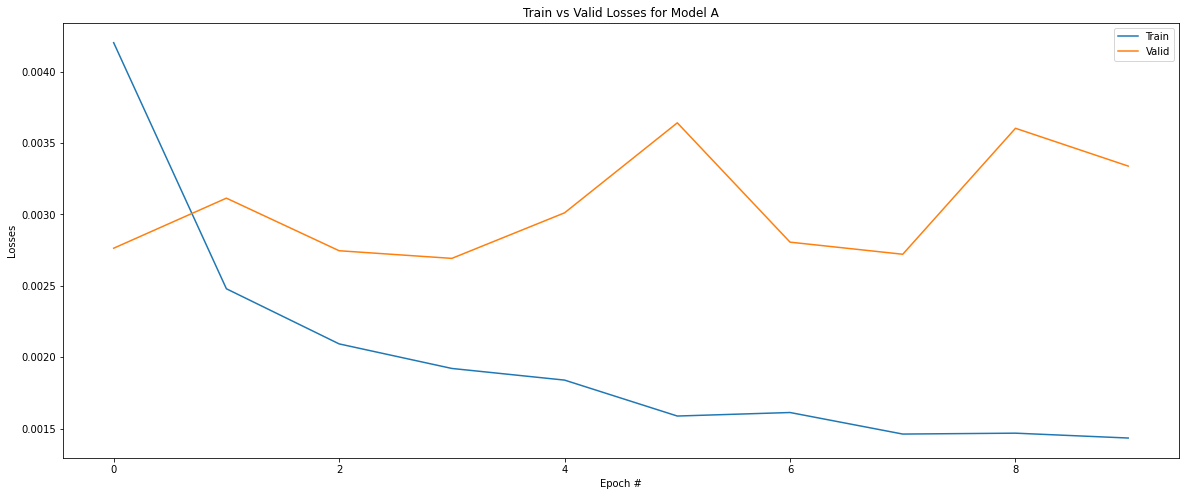

In [69]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model A
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_train_losses_A)
plt.plot(epoch_valid_losses_A)
plt.xlabel('Epoch #')
plt.ylabel('Losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses for Model A')
plt.show()

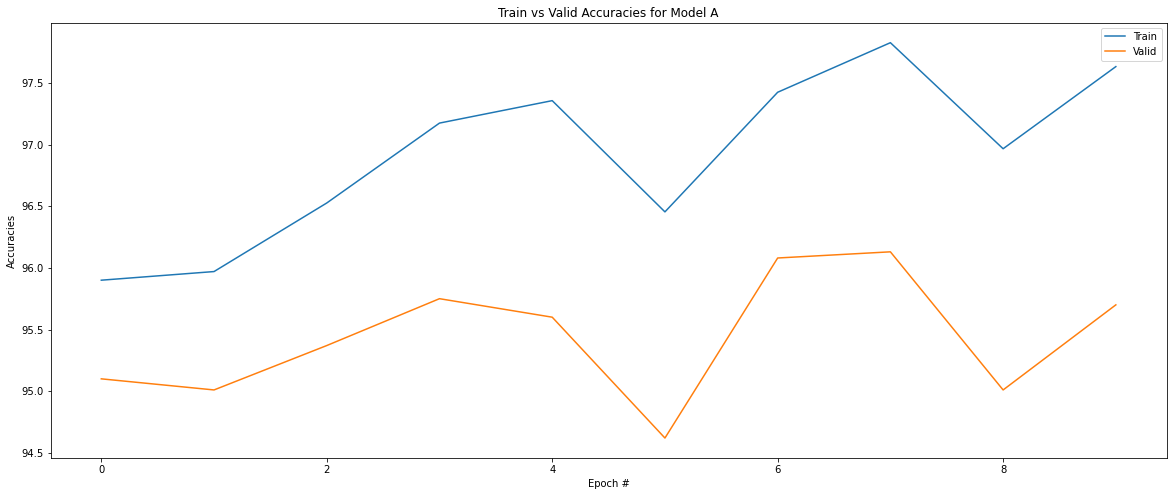

In [70]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model A
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_train_accuracies_A)
plt.plot(epoch_valid_accuracies_A)
plt.xlabel('Epoch #')
plt.ylabel('Accuracies')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracies for Model A')
plt.show()

### Model B


In [71]:
# Training Loop for model B
# Optimizer for model B's parameters
optimizerB = _optimizer(modelB , lr)

# Training and validation losses in each epoch
epoch_train_losses_B = []
epoch_valid_losses_B = []
epoch_train_accuracies_B = []
epoch_valid_accuracies_B = []

start_time = time.time()

for epoch in range(epochs):

    epoch_train_loss = 0      # total training loss over all images in 1 epoch
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)   # run on gpu
        inputs = inputs.view(-1 , 28*28)                        # flatten the image from (1 x 28 x 28) to (28*28)
        optimizerB.zero_grad()                                  # reset gradients to zero
        outputs = modelB(inputs)                                # find output
        loss = criterion(outputs, labels)                       # find batch loss
        loss.backward()                                         # find gradients    
        epoch_train_loss += loss.item()                         # add batch loss to total loss
        optimizerB.step()                                       # update params
  
    epoch_train_losses_B.append(epoch_train_loss / len(train_loader.dataset))

    epoch_valid_loss = 0
    epoch_train_accuracy = 0
    epoch_valid_accuracy = 0
    with torch.no_grad():
        # accuracy on training set
        correct = 0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = inputs.view(-1 , 28*28)
            y_pred = modelB(inputs)
            y_pred_cls = torch.argmax(y_pred , dim=1)
            correct += y_pred_cls.eq(labels).sum()
        epoch_train_accuracy = 100 * correct / len(train_loader.dataset)
        epoch_train_accuracies_B.append(epoch_train_accuracy.item())
        # loss and accuracy on validation set
        correct = 0
        for i, (inputs, labels) in enumerate(valid_loader):
            inputs, labels = inputs.to(device), labels.to(device) 
            inputs = inputs.view(-1 , 28*28)                      
            outputs = modelB(inputs)                              
            loss = criterion(outputs, labels)                     
            epoch_valid_loss += loss.item()
            y_pred_cls = torch.argmax(outputs , dim=1)
            correct += y_pred_cls.eq(labels).sum()                       

        epoch_valid_losses_B.append(epoch_valid_loss / len(valid_loader.dataset))
        epoch_valid_accuracy = 100 * correct / len(valid_loader.dataset)
        epoch_valid_accuracies_B.append(epoch_valid_accuracy.item())

    print(f"Epoch {epoch:3}. Training Loss: {epoch_train_losses_B[-1]:.6f},  Validation Loss: {epoch_valid_losses_B[-1]:.6f}, Training Accuracy: {epoch_train_accuracy.item()}, Validation Accuracy: {epoch_valid_accuracy.item()}")

end_time = time.time()
print(f"Training Model B took {end_time-start_time} seconds for {epochs} epochs")

Epoch   0. Training Loss: 0.004942,  Validation Loss: 0.003535, Training Accuracy: 94.50399780273438, Validation Accuracy: 93.72999572753906
Epoch   1. Training Loss: 0.002916,  Validation Loss: 0.003129, Training Accuracy: 96.18999481201172, Validation Accuracy: 95.19999694824219
Epoch   2. Training Loss: 0.002623,  Validation Loss: 0.003060, Training Accuracy: 96.70199584960938, Validation Accuracy: 95.14999389648438
Epoch   3. Training Loss: 0.002192,  Validation Loss: 0.002314, Training Accuracy: 97.41600036621094, Validation Accuracy: 96.25999450683594
Epoch   4. Training Loss: 0.002058,  Validation Loss: 0.003212, Training Accuracy: 96.34600067138672, Validation Accuracy: 95.18000030517578
Epoch   5. Training Loss: 0.002009,  Validation Loss: 0.003001, Training Accuracy: 97.2719955444336, Validation Accuracy: 95.80999755859375
Epoch   6. Training Loss: 0.001986,  Validation Loss: 0.002938, Training Accuracy: 96.9939956665039, Validation Accuracy: 95.38999938964844
Epoch   7. Trai

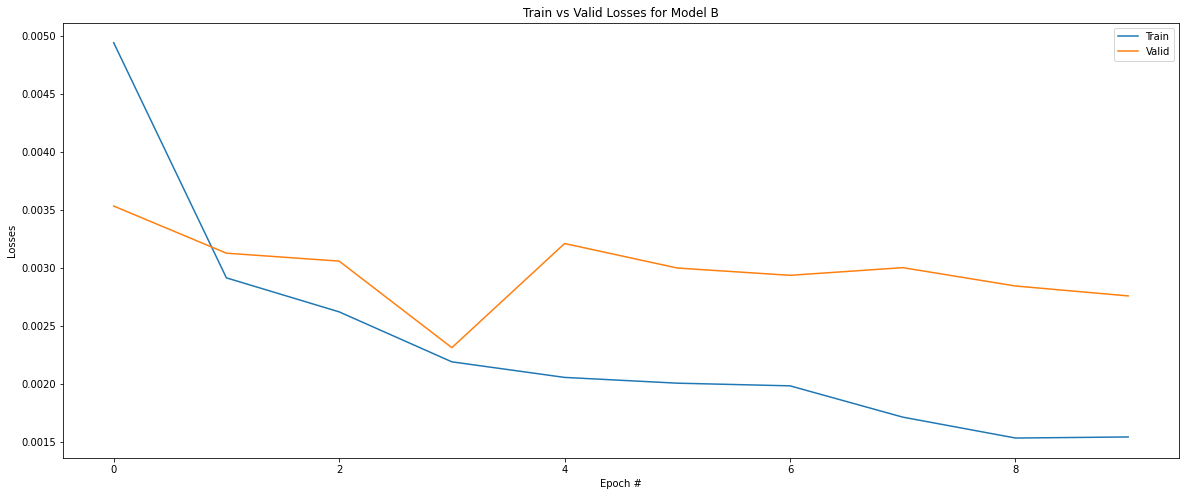

In [72]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model B
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_train_losses_B)
plt.plot(epoch_valid_losses_B)
plt.xlabel('Epoch #')
plt.ylabel('Losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses for Model B')
plt.show()

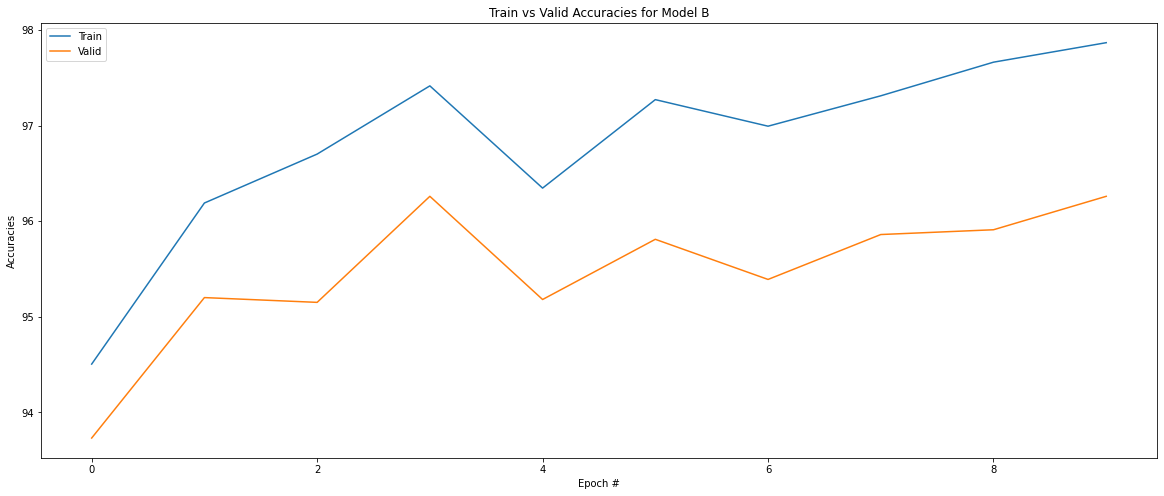

In [73]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model B
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_train_accuracies_B)
plt.plot(epoch_valid_accuracies_B)
plt.xlabel('Epoch #')
plt.ylabel('Accuracies')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracies for Model B')
plt.show()

### Model C


In [74]:
# Training Loop for model C
# Optimizer for model C's parameters
optimizerC = _optimizer(modelC , lr)

# Training and validation losses in each epoch
epoch_train_losses_C = []
epoch_valid_losses_C = []
epoch_train_accuracies_C = []
epoch_valid_accuracies_C = []

start_time = time.time()

for epoch in range(epochs):

    epoch_train_loss = 0      # total training loss over all images in 1 epoch
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)   # run on gpu
        inputs = inputs.view(-1 , 28*28)                        # flatten the image from (1 x 28 x 28) to (28*28)
        optimizerC.zero_grad()                                  # reset gradients to zero
        outputs = modelC(inputs)                                # find output
        loss = criterion(outputs, labels)                       # find batch loss
        loss.backward()                                         # find gradients    
        epoch_train_loss += loss.item()                         # add batch loss to total loss
        optimizerC.step()                                       # update params
  
    epoch_train_losses_C.append(epoch_train_loss / len(train_loader.dataset))

    epoch_valid_loss = 0    
    epoch_train_accuracy = 0
    epoch_valid_accuracy = 0
    with torch.no_grad():   # No need to compute gradients now, since we are only testing on the validation set
        # accuracy on training set
        correct = 0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = inputs.view(-1 , 28*28)
            y_pred = modelC(inputs)
            y_pred_cls = torch.argmax(y_pred , dim=1)
            correct += y_pred_cls.eq(labels).sum()
        epoch_train_accuracy = 100 * correct / len(train_loader.dataset)
        epoch_train_accuracies_C.append(epoch_train_accuracy.item())

        # loss and accuracy on validation set
        correct = 0
        for i, (inputs, labels) in enumerate(valid_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = inputs.view(-1 , 28*28)                      
            outputs = modelC(inputs)                     
            loss = criterion(outputs, labels)                     
            epoch_valid_loss += loss.item()
            y_pred_cls = torch.argmax(outputs , dim=1)
            correct += y_pred_cls.eq(labels).sum()

        epoch_valid_accuracy = 100 * correct / len(valid_loader.dataset)
        epoch_valid_accuracies_C.append(epoch_valid_accuracy.item())
        epoch_valid_losses_C.append(epoch_valid_loss / len(valid_loader.dataset))  

    print(f"Epoch {epoch:3}. Training Loss: {epoch_train_losses_C[-1]:.6f},  Validation Loss: {epoch_valid_losses_C[-1]:.6f}, Training Accuracy: {epoch_train_accuracy.item()}, Validation Accuracy: {epoch_valid_accuracy.item()}")

end_time = time.time()
print(f"Training Model C took {end_time-start_time} seconds for {epochs} epochs")

Epoch   0. Training Loss: 0.006100,  Validation Loss: 0.004396, Training Accuracy: 93.83999633789062, Validation Accuracy: 92.79000091552734
Epoch   1. Training Loss: 0.003913,  Validation Loss: 0.004163, Training Accuracy: 93.73400115966797, Validation Accuracy: 92.79999542236328
Epoch   2. Training Loss: 0.003158,  Validation Loss: 0.003218, Training Accuracy: 95.9020004272461, Validation Accuracy: 94.81999969482422
Epoch   3. Training Loss: 0.002656,  Validation Loss: 0.003254, Training Accuracy: 95.88599395751953, Validation Accuracy: 94.81999969482422
Epoch   4. Training Loss: 0.002539,  Validation Loss: 0.003402, Training Accuracy: 95.43000030517578, Validation Accuracy: 94.43999481201172
Epoch   5. Training Loss: 0.002736,  Validation Loss: 0.003559, Training Accuracy: 96.22599792480469, Validation Accuracy: 94.79000091552734
Epoch   6. Training Loss: 0.002534,  Validation Loss: 0.003297, Training Accuracy: 96.83599853515625, Validation Accuracy: 95.3499984741211
Epoch   7. Trai

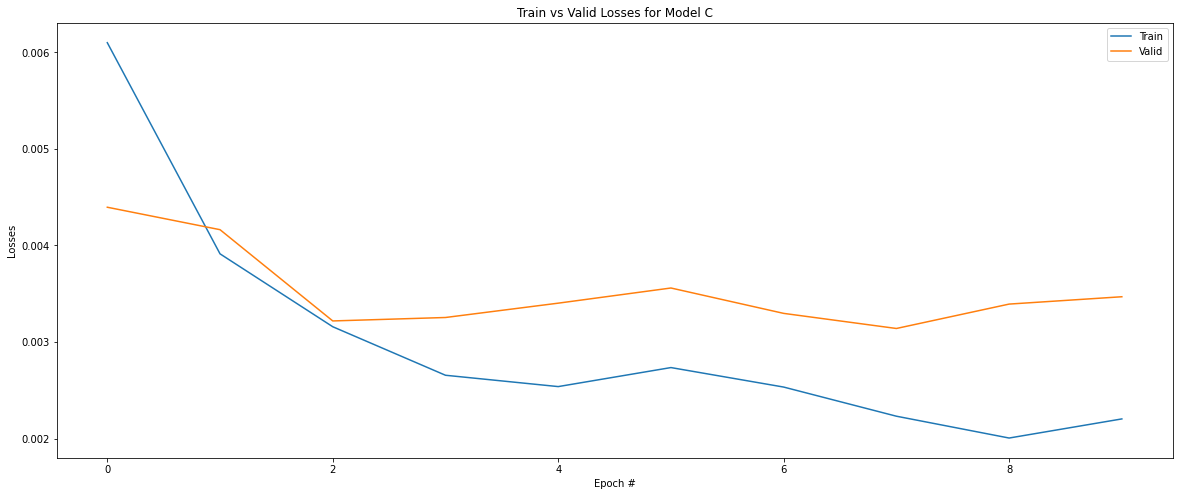

In [75]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model C
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_train_losses_C)
plt.plot(epoch_valid_losses_C)
plt.xlabel('Epoch #')
plt.ylabel('Losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses for Model C')
plt.show()

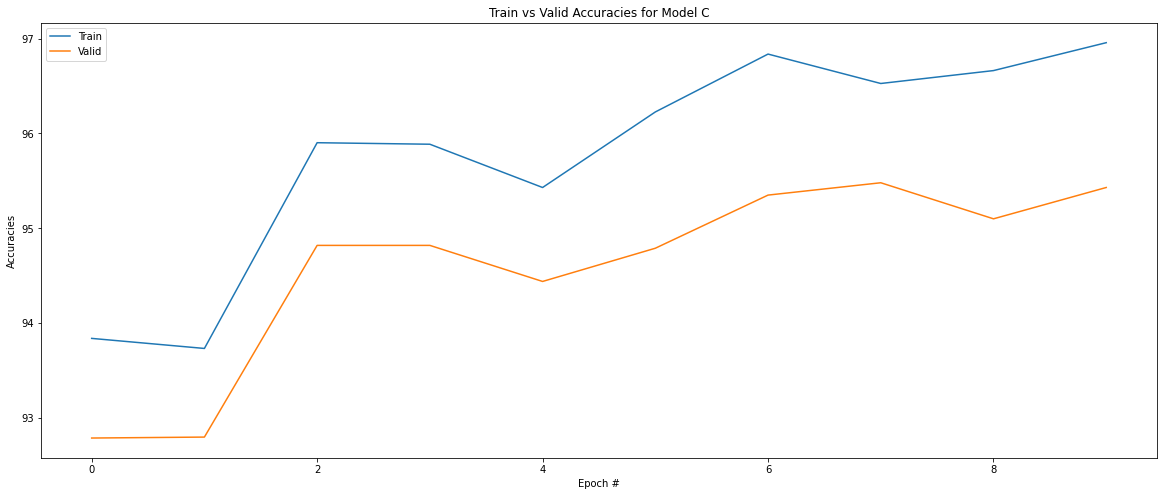

In [76]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model C
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_train_accuracies_C)
plt.plot(epoch_valid_accuracies_C)
plt.xlabel('Epoch #')
plt.ylabel('Accuracies')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracies for Model C')
plt.show()

## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [79]:
# Choose the best model out of A , B , C based on maximum accuracy on validation set
Models = [ModelA , ModelB , ModelC]
accuracies = [epoch_valid_accuracies_A[epochs-1] , epoch_valid_accuracies_B[epochs-1] , epoch_valid_accuracies_C[epochs-1]]
# print(accuracies)
idx = np.argmax(accuracies)
relu = Models[idx]              # relu is the best ReLU Model Class out of A,B,C

# Since the number of hidden layers is a variable, we can define all possible models and then choose the best one

# Leaky ReLU models definiton
# Leaky Model A Definition
class ModelLeakyA(nn.Module):

    def __init__(self , input , hidden_1 , hidden_2 , output):
        super(ModelLeakyA , self).__init__()
        self.c1 = nn.Linear(input , hidden_1)
        self.a1 = nn.LeakyReLU()
        self.c2 = nn.Linear(hidden_1 , hidden_2)
        self.a2 = nn.LeakyReLU()
        self.c3 = nn.Linear(hidden_2 , output)

    def forward(self , x):
        y = self.c1(x)
        y = self.a1(y)
        y = self.c2(y)
        y = self.a2(y)
        y = self.c3(y)
        return y

# Leaky Model B Definiton
class ModelLeakyB(nn.Module):

    def __init__(self , input , hidden_1 , hidden_2 , hidden_3 , output):
        super(ModelLeakyB , self).__init__()
        self.c1 = nn.Linear(input , hidden_1)
        self.a1 = nn.LeakyReLU()
        self.c2 = nn.Linear(hidden_1 , hidden_2)
        self.a2 = nn.LeakyReLU()
        self.c3 = nn.Linear(hidden_2 , hidden_3)
        self.a3 = nn.LeakyReLU()
        self.c4 = nn.Linear(hidden_3 , output)
    
    def forward(self , x):
        y = self.c1(x)
        y = self.a1(y)
        y = self.c2(y)
        y = self.a2(y)
        y = self.c3(y)
        y = self.a3(y)
        y = self.c4(y)
        return y

# Leaky Model C Definition
class ModelLeakyC(nn.Module):

    def __init__(self , input , hidden_1 , hidden_2 , hidden_3 , hidden_4 , output):
        super(ModelLeakyC , self).__init__()
        self.c1 = nn.Linear(input , hidden_1)
        self.a1 = nn.LeakyReLU()
        self.c2 = nn.Linear(hidden_1 , hidden_2)
        self.a2 = nn.LeakyReLU()
        self.c3 = nn.Linear(hidden_2 , hidden_3)
        self.a3 = nn.LeakyReLU()
        self.c4 = nn.Linear(hidden_3 , hidden_4)
        self.a4 = nn.LeakyReLU()
        self.c5 = nn.Linear(hidden_4 , output)

    def forward(self , x):
        y = self.c1(x)
        y = self.a1(y)
        y = self.c2(y)
        y = self.a2(y)
        y = self.c3(y)
        y = self.a3(y)
        y = self.c4(y)
        y = self.a4(y)
        y = self.c5(y)
        return y

# Tanh models definition
# Tanh Model A Definition 
class ModelTanhA(nn.Module):

    def __init__(self , input , hidden_1 , hidden_2 , output):
        super(ModelTanhA , self).__init__()
        self.c1 = nn.Linear(input , hidden_1)
        self.a1 = nn.Tanh()
        self.c2 = nn.Linear(hidden_1 , hidden_2)
        self.a2 = nn.Tanh()
        self.c3 = nn.Linear(hidden_2 , output)

    def forward(self , x):
        y = self.c1(x)
        y = self.a1(y)
        y = self.c2(y)
        y = self.a2(y)
        y = self.c3(y)
        return y

# Tanh Model B Definiton
class ModelTanhB(nn.Module):

    def __init__(self , input , hidden_1 , hidden_2 , hidden_3 , output):
        super(ModelTanhB , self).__init__()
        self.c1 = nn.Linear(input , hidden_1)
        self.a1 = nn.Tanh()
        self.c2 = nn.Linear(hidden_1 , hidden_2)
        self.a2 = nn.Tanh()
        self.c3 = nn.Linear(hidden_2 , hidden_3)
        self.a3 = nn.Tanh()
        self.c4 = nn.Linear(hidden_3 , output)
    
    def forward(self , x):
        y = self.c1(x)
        y = self.a1(y)
        y = self.c2(y)
        y = self.a2(y)
        y = self.c3(y)
        y = self.a3(y)
        y = self.c4(y)
        return y

# Tanh Model C Definition
class ModelTanhC(nn.Module):

    def __init__(self , input , hidden_1 , hidden_2 , hidden_3 , hidden_4 , output):
        super(ModelTanhC , self).__init__()
        self.c1 = nn.Linear(input , hidden_1)
        self.a1 = nn.Tanh()
        self.c2 = nn.Linear(hidden_1 , hidden_2)
        self.a2 = nn.Tanh()
        self.c3 = nn.Linear(hidden_2 , hidden_3)
        self.a3 = nn.Tanh()
        self.c4 = nn.Linear(hidden_3 , hidden_4)
        self.a4 = nn.Tanh()
        self.c5 = nn.Linear(hidden_4 , output)

    def forward(self , x):
        y = self.c1(x)
        y = self.a1(y)
        y = self.c2(y)
        y = self.a2(y)
        y = self.c3(y)
        y = self.a3(y)
        y = self.c4(y)
        y = self.a4(y)
        y = self.c5(y)
        return y

# Make leaky and tanh versions of all Models A,B,C and then pick the leaky and tanh versions of the best one out of Models A,B,C

# Maintain these variable names
model_relu = 0
model_lrelu = 0
model_tanh = 0
if(relu == ModelA):
    model_relu = modelA
    model_lrelu = ModelLeakyA(28 * 28 , 64 , 128 , 10)
    model_tanh = ModelTanhA(28 * 28 , 64 , 128 , 10)
    print("Model A is the best")
elif(relu == ModelB):
    model_relu = modelB
    model_lrelu = ModelLeakyB(28 * 28 , 64 , 128 , 256 , 10)
    model_tanh = ModelTanhB(28 * 28 , 64 , 128 , 256 , 10)
    print("Model B is the best")
else:# relu == ModelC
    model_relu = modelC
    model_lrelu = ModelLeakyC(28 * 28 , 64 , 128 , 256 , 512 , 10)
    model_tanh = ModelTanhC(28 * 28 , 64 , 128 , 256 , 512 , 10)
    print("Model C is the best")
if(torch.cuda.is_available()):
    model_lrelu.to(device)
    model_tanh.to(device)

Model B is the best


### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [80]:
# Training Loop for LRELU
# Optimizer for model lrelu's parameters
optimizerlrelu = _optimizer(model_lrelu , lr)

# Training and validation losses in each epoch
epoch_train_losses_lrelu = []
epoch_valid_losses_lrelu = []

epoch_train_accuracies_lrelu = []
epoch_valid_accuracies_lrelu = []

start_time = time.time()

for epoch in range(epochs):

    epoch_train_loss = 0      # total training loss over all images in 1 epoch
    # loss on training set
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)   # run on gpu
        inputs = inputs.view(-1 , 28*28)                        # flatten the image from (1 x 28 x 28) to (28*28)
        optimizerlrelu.zero_grad()                                  # reset gradients to zero
        outputs = model_lrelu(inputs)                                # find output
        loss = criterion(outputs, labels)                       # find batch loss
        loss.backward()                                         # find gradients    
        epoch_train_loss += loss.item()                         # add batch loss to total loss
        optimizerlrelu.step()                                       # update params
  
    epoch_train_losses_lrelu.append(epoch_train_loss / len(train_loader.dataset))

    epoch_valid_loss = 0
    epoch_valid_accuracy = 0    
    epoch_train_accuracy = 0
    with torch.no_grad():   # No need to compute gradients now, since we are only testing validation loss and accuracies

        # accuracy on training set
        correct = 0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = inputs.view(-1 , 28*28)
            y_pred = model_lrelu(inputs)
            y_pred_cls = torch.argmax(y_pred , dim=1)
            correct += y_pred_cls.eq(labels).sum()
        epoch_train_accuracy = 100 * correct / len(train_loader.dataset)
        epoch_train_accuracies_lrelu.append(epoch_train_accuracy.item())

        # loss and accuracy on validation set
        correct = 0
        for i, (inputs, labels) in enumerate(valid_loader):
            inputs, labels = inputs.to(device), labels.to(device) 
            inputs = inputs.view(-1 , 28*28)                     
            outputs = model_lrelu(inputs)                              
            loss = criterion(outputs, labels)                     
            epoch_valid_loss += loss.item()                       
            y_pred_cls = torch.argmax(outputs , dim=1)
            correct += y_pred_cls.eq(labels).sum()

        epoch_valid_losses_lrelu.append(epoch_valid_loss / len(valid_loader.dataset))
        epoch_valid_accuracy = 100 * correct / len(valid_loader.dataset)
        epoch_valid_accuracies_lrelu.append(epoch_valid_accuracy.item())

    print(f"Epoch {epoch:3}. Training Loss: {epoch_train_losses_lrelu[-1]:.6f},  Validation Loss: {epoch_valid_losses_lrelu[-1]:.6f}, Training Accuracy: {epoch_train_accuracy.item()} , Validation Accuracy: {epoch_valid_accuracy.item()}")

end_time = time.time()
print(f"Training Model LReLU took {end_time-start_time} seconds for {epochs} epochs")

Epoch   0. Training Loss: 0.004943,  Validation Loss: 0.003561, Training Accuracy: 94.5260009765625 , Validation Accuracy: 93.97999572753906
Epoch   1. Training Loss: 0.003090,  Validation Loss: 0.003413, Training Accuracy: 95.5459976196289 , Validation Accuracy: 94.57999420166016
Epoch   2. Training Loss: 0.002536,  Validation Loss: 0.003216, Training Accuracy: 95.98600006103516 , Validation Accuracy: 94.8699951171875
Epoch   3. Training Loss: 0.002504,  Validation Loss: 0.003730, Training Accuracy: 96.0219955444336 , Validation Accuracy: 94.80999755859375
Epoch   4. Training Loss: 0.002204,  Validation Loss: 0.003511, Training Accuracy: 96.28199768066406 , Validation Accuracy: 94.72999572753906
Epoch   5. Training Loss: 0.002023,  Validation Loss: 0.003397, Training Accuracy: 96.46199798583984 , Validation Accuracy: 95.14999389648438
Epoch   6. Training Loss: 0.001623,  Validation Loss: 0.002776, Training Accuracy: 97.65599822998047 , Validation Accuracy: 95.97999572753906
Epoch   7.

In [81]:
# Training Loop for TanH
# Optimizer for model tanh's parameters
optimizertanh = _optimizer(model_tanh , lr)

# Training and validation losses in each epoch
epoch_train_losses_tanh = []
epoch_valid_losses_tanh = []

epoch_train_accuracies_tanh = []
epoch_valid_accuracies_tanh = []

start_time = time.time()

for epoch in range(epochs):

    epoch_train_loss = 0      # total training loss over all images in 1 epoch
    # loss on training set
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)   # run on gpu
        inputs = inputs.view(-1 , 28*28)                        # flatten the image from (1 x 28 x 28) to (28*28)
        optimizertanh.zero_grad()                                  # reset gradients to zero
        outputs = model_tanh(inputs)                                # find output
        loss = criterion(outputs, labels)                       # find batch loss
        loss.backward()                                         # find gradients    
        epoch_train_loss += loss.item()                         # add batch loss to total loss
        optimizertanh.step()                                       # update params
  
    epoch_train_losses_tanh.append(epoch_train_loss / len(train_loader.dataset))

    epoch_valid_loss = 0
    epoch_valid_accuracy = 0    
    epoch_train_accuracy = 0
    with torch.no_grad():   # No need to compute gradients now, since we are only testing validation loss and accuracies

        # accuracy on training set
        correct = 0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = inputs.view(-1 , 28*28)
            y_pred = model_tanh(inputs)
            y_pred_cls = torch.argmax(y_pred , dim=1)
            correct += y_pred_cls.eq(labels).sum()
        epoch_train_accuracy = 100 * correct / len(train_loader.dataset)
        epoch_train_accuracies_tanh.append(epoch_train_accuracy.item())

        # loss and accuracy on validation set
        correct = 0
        for i, (inputs, labels) in enumerate(valid_loader):
            inputs, labels = inputs.to(device), labels.to(device) 
            inputs = inputs.view(-1 , 28*28)                     
            outputs = model_tanh(inputs)                              
            loss = criterion(outputs, labels)                     
            epoch_valid_loss += loss.item()                       
            y_pred_cls = torch.argmax(outputs , dim=1)
            correct += y_pred_cls.eq(labels).sum()

        epoch_valid_losses_tanh.append(epoch_valid_loss / len(valid_loader.dataset))
        epoch_valid_accuracy = 100 * correct / len(valid_loader.dataset)
        epoch_valid_accuracies_tanh.append(epoch_valid_accuracy.item())

    print(f"Epoch {epoch:3}. Training Loss: {epoch_train_losses_tanh[-1]:.6f},  Validation Loss: {epoch_valid_losses_tanh[-1]:.6f}, Training Accuracy: {epoch_train_accuracy.item()} , Validation Accuracy: {epoch_valid_accuracy.item()}")

end_time = time.time()
print(f"Training Model LReLU took {end_time-start_time} seconds for {epochs} epochs")

Epoch   0. Training Loss: 0.005981,  Validation Loss: 0.004274, Training Accuracy: 93.58599853515625 , Validation Accuracy: 92.65999603271484
Epoch   1. Training Loss: 0.004354,  Validation Loss: 0.005191, Training Accuracy: 93.10599517822266 , Validation Accuracy: 92.25999450683594
Epoch   2. Training Loss: 0.004285,  Validation Loss: 0.005250, Training Accuracy: 92.41799926757812 , Validation Accuracy: 91.41999816894531
Epoch   3. Training Loss: 0.004295,  Validation Loss: 0.005719, Training Accuracy: 90.72799682617188 , Validation Accuracy: 90.31999969482422
Epoch   4. Training Loss: 0.004489,  Validation Loss: 0.004888, Training Accuracy: 92.96599578857422 , Validation Accuracy: 91.97000122070312
Epoch   5. Training Loss: 0.004363,  Validation Loss: 0.004719, Training Accuracy: 93.23400115966797 , Validation Accuracy: 92.5199966430664
Epoch   6. Training Loss: 0.004180,  Validation Loss: 0.005795, Training Accuracy: 92.3699951171875 , Validation Accuracy: 91.36000061035156
Epoch   

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [82]:
# Define how to calculate Accuracy on Test Set
def test_accuracy(model , testloader):
    with torch.no_grad():
        correct = 0
        for i, (inputs, labels) in enumerate(testloader):
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = inputs.view(-1 , 28*28)
            y_pred = model(inputs)
            y_pred_cls = torch.argmax(y_pred , dim=1)
            correct += y_pred_cls.eq(labels).sum()
        acc = 100 * correct / len(testloader.dataset)
        return acc

In [83]:
# Accuracy of RELU model
accuracy_relu_test = test_accuracy(model_relu , test_loader)
print(f"Test accuracy of ReLU model : {accuracy_relu_test}")

Test accuracy of ReLU model : 96.52999877929688


In [84]:
# Accuracy of TanH model
accuracy_tanh_test = test_accuracy(model_tanh , test_loader)
print(f"Test accuracy of TanH model : {accuracy_tanh_test}")

Test accuracy of TanH model : 93.41999816894531


In [85]:
# Accuracy of LeakyReLU model
accuracy_lrelu_test = test_accuracy(model_lrelu , test_loader)
print(f"Test accuracy of Leaky ReLU model : {accuracy_lrelu_test}")

Test accuracy of Leaky ReLU model : 96.5199966430664


Fill in these with the values you obtained from training.

* ReLU model Test Set Accuracy: `96.529` %
* TanH model Test Set Accuracy: `93.419` %
* LeakReLU model Test Set Accuracy: `96.519` %